In [62]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
# TO USE:
# Uncomment three !pip install lines
# Run this cell ONLY
# Runtime -> Restart session
# Comment three !pip install lines
# Run all

# Andy can push

# Pandas 1.5.3
# Numpy 1.26.3
# Json 2.0.9
# NLTK (Natural Language Toolkit) 3.8.1
# Gensim 4.3.2
# Spacy 3.6.1
# PyLDAvis 3.4.0
# re (removing characters) 2.2.1
# clean from cleantext
# from prompt_toolkit.completion import word_completer
# from pprint import pprint
# import matplotlib.pyplot as plt


%pip install pyLDAvis
%pip install --user -U nltk
%pip install -U spacy
%pip install "pandas==1.5.3"


  Using cached pandas-2.2.1-cp311-cp311-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.1-cp311-cp311-win_amd64.whl (11.6 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3


  You can safely remove it manually.


Note: you may need to restart the kernel to use updated packages.

  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata (12 kB)
Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl (10.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [63]:
#

import numpy as np
import json
import glob
import nltk
import pandas as pd #to work with csv files

# pd.__version__ = 2.0.0
print(pd.__version__)

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

1.5.3


In [64]:
import os
#The function that loops through the data to check for optimal parameters to input into the LDA model would take over 16 hours to run,
#after a while the runtime disconnects, which makes the progress start from 0.
#so the purpose of this function is to make sure the runtime doesnt disconnect, while training for optimal params to input to lda model.

#def check_and_reconnect_drive():
    #try:
        # Check if Google Drive is still connected
     #   os.listdir('/content/drive')
  #  except:
        # If not, reconnect it
  #      from google.colab import drive
  #      drive.mount('/content/drive', force_remount=True)

# Then call this function every so often in your main script
#check_and_reconnect_drive()

In [65]:
nltk.download('stopwords')

stopwords = stopwords.words("english") #get stopwords from nltk

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
#stopwords.extend(['hi', 'anymore', 'years', 'ago', 'almost', 'somehow', 'remember', 'wants', 'either', 'enough', 'much', 'making', 'simple', 'things', 'add', 'actual', 'say', 'etc', 'anything', 'days', 'long', 'another', 'ever', 'yes', 'th', 'ice', 'mightymouse', 'should', 'obviously', 'even', 'lol', 'stuff', 'never', 'old', 'yr', 'bit', 'like', 'aka', 'nonsense', 'ok', 'absolutely', 'op', 'weird', 'ass', 'fully', 'get', 'would', 'definitely', 'especially', 'still', 'else', 'something', 'often', 'kind', 'let', 'lot', 'able', 'non', 'pg', 'nice', 'trad', 'keep', 'massive', 'quickly', 'be', 'common', 'tv', 'fuckin', 'im', 'could', 'also', 'silly', 'ie', 'seem', 'seems', 'fucked'])#Add custom stop words
stopwords.extend(['r/parenting', 'r/roblox', 'get'])#Add reddit paths

In [67]:
def wordcounts(text1):
  fdist1 = FreqDist(text1)
  print(fdist1)
  fdist1.most_common(50)

In [68]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]

In [69]:
def load_data(file):
  data = pd.read_csv(file)
  return data

In [70]:
data = load_data('../Used_Dataset/finalCumulative.csv')
filtered_data = data.drop(columns=['subreddit','date','timestamp'], axis=1)
data = filtered_data.replace('\n', ' ', regex=True)
# data.head(5)

In [71]:
# data[data.text.str.contains('I am a bot')]

In [72]:
import re

data = data.loc[data.text.str.contains('I am a bot') == False, :]

# Remove punctuation
# data['text'] = data['text'].map(lambda x: re.sub("[,\.!?/@#$^&*-_=+()%]", "", x))
data['text'] = data['text'].replace(r'http\S+', '', regex=True)

#data['text'] = data['text'].replace(r'a'+ u'\u0301'+ 'U+20AC'+ 'U+2122', "'" , regex=True)

data['text'] = data['text'].map(lambda x: re.sub('[%$:,\.!?/-]', ' ', x))
data['text'] = data['text'].map(lambda x: re.sub('\(', ' ', x))
data['text'] = data['text'].map(lambda x: re.sub('\)', ' ', x))
data['text'] = data['text'].replace(r'&\S+', '', regex=True)
data['text'] = data['text'].replace('\"', '', regex=True)

# # Convert the titles to lowercase
data['text'] = data['text'].map(lambda x: x.lower())

pattern = r'[0-9]'
data['text'] = data['text'].map(lambda x: re.sub(pattern, ' ', x))
data['text'] = data['text'].map(lambda x: re.sub(' +', ' ', x))

data.shape

(21164, 2)

In [73]:
data.columns

Index(['Unnamed: 0', 'text'], dtype='object')

In [74]:
data.head(5)

,Unnamed: 0,text
0,1716,roblox
1,1717,paid my taxes in years i have not die in a sho...
2,1718,kid's username checks out
3,1719,well it got al capone
4,1720,understandable have a great day


In [75]:
data[data.text.str.contains('I am a bot')]

,Unnamed: 0,text


In [76]:
data['text'][51]

'r gocommitdie'

In [77]:
!pip install clean-text
from cleantext import clean

In [78]:
data = [clean(d, no_emoji=True) for d in data['text']]

In [79]:
data = remove_stopwords(data)

In [80]:
resultx = []
for d in data:
  resultx.append(' '.join(d))

#resultxtokens = resultx.split()


In [81]:
resultx[:5]

['roblox',
 'paid taxes years die shootout irs',
 'kid username checks',
 'well got al capone',
 'understandable great day']

In [82]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')
words = [word_tokenize(i) for i in resultx]
words2= [num for elem in words for num in elem]
#words = nltk.tokenize.word_tokenize(resultx)

#wordcounts(words2)
fdist1 = FreqDist(words2)
#print(fdist1)
fdist1.most_common(50)


#>>> # flatten a list using a listcomp with two 'for'
#>>> vec = [[1,2,3], [4,5,6], [7,8,9]]
#>>> [num for elem in vec for num in elem]
#[1, 2, 3, 4, 5, 6, 7, 8, 9]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('game', 5703),
 ('like', 5580),
 ('games', 4792),
 ('kids', 4271),
 ('roblox', 3781),
 ('time', 3279),
 ('play', 3216),
 ('would', 2829),
 ('people', 2606),
 ('one', 2352),
 ('think', 2352),
 ('also', 2307),
 ('kid', 2258),
 ('know', 2188),
 ('money', 2169),
 ('make', 2169),
 ('good', 2138),
 ('even', 2104),
 ('old', 2101),
 ('year', 2000),
 ('pokemon', 1920),
 ('really', 1872),
 ('want', 1746),
 ('things', 1740),
 ('much', 1736),
 ('still', 1712),
 ('something', 1633),
 ('way', 1589),
 ('playing', 1500),
 ('better', 1432),
 ('let', 1403),
 ('phone', 1397),
 ('could', 1361),
 ('child', 1347),
 ('see', 1296),
 ('need', 1278),
 ('buy', 1247),
 ('go', 1245),
 ('friends', 1241),
 ('got', 1225),
 ('lot', 1209),
 ('say', 1208),
 ('never', 1202),
 ('going', 1195),
 ('son', 1185),
 ('daughter', 1184),
 ('back', 1160),
 ('well', 1148),
 ('every', 1141),
 ('parents', 1133)]

In [83]:
result = []
for d in data:
  result.append(' '.join(d))
# result

In [84]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
      yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# data = filtered_data.review_text_processed.values.tolist()
data_words = list(sent_to_words(result))

# prints the first 30 words of the first tokenized review from the data_words list.
# print(data_words[:1][0][:30])

In [85]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [86]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [87]:
# # NO BIGRAMS
# !python -m spacy download en_core_web_sm
# import spacy

# # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# # Do lemmatization keeping only noun, adj, vb, adv
# data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [88]:
# BIGRAMS DATA
!python -m spacy download en_core_web_sm
import spacy

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Form Trigrams
data_words_trigrams = make_trigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
# data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']) # for unigram
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']) # for bigram
# data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']) # for bigram


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 325.1 kB/s eta 0:00:40
     ---------------------------------------- 0.1/12.8 MB 1.0 MB/s eta 0:00:13
     - -------------------------------------- 0.5/12.8 MB 2.9 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 4.7 MB/s eta 0:00:03
     ---- ----------------------------------- 1.5/12.8 MB 5.8 MB/s eta 0:00:02
     ----- ---------------------------------- 1.9/12.8 MB 6.2 MB/s eta 0:00:02
     ------- -------------------------------- 2.5/12.8 MB 7.1 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.8 MB 7.1 MB/s eta 0:00:02
     ---------- ----------------------------- 3.4/12.8 MB 7.5 MB/s eta 0:00:02
     ------------ --------------------------- 3.9/12.8 MB 7.9 MB/s eta 0:00:02
     ------------- -------------------------- 4.4/12.8 MB 8.3 MB/

In [89]:
print(type(data_lemmatized))

<class 'list'>


Remove Duplicate Words (TO REMOVE)

In [90]:
# from collections import Counter
# def unique(d):
#   UniqW = Counter(d)
#   result = [*UniqW]
#   # corpus = ' '.join(UniqW.keys())
#   return result

In [91]:
# single_data = []
# for d in data_lemmatized:
#   for word in d:
#     single_data.append(word)

In [92]:
# unique_data = [unique(d) for d in data_lemmatized]
# # unique_data = unique(single_data)

In [93]:
# print(type(unique_data))

In [94]:
# unique_data

In [95]:
from prompt_toolkit.completion import word_completer
id2word = corpora.Dictionary(data_lemmatized)
# id2word = corpora.Dictionary(bag_of_words)

corpus = []
for text in data_lemmatized:
  new = id2word.doc2bow(text)
  corpus.append(new)

print(corpus[0])

print(data_words[:1][0][:30])
# print(word_completer)

[(0, 1)]
['roblox']


In [96]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True,
                                       alpha=0.01,
                                       eta=0.61)

In [97]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds', R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.230453  0.076408       1        1  60.965383
1      0.059354  0.167149       2        1  26.109222
3      0.105130 -0.129761       3        1   9.784805
2     -0.208112  0.012723       4        1   1.675922
0     -0.186825 -0.126520       5        1   1.464667, topic_info=       Term         Freq        Total Category  logprob  loglift
21     game  9376.000000  9376.000000  Default  30.0000  30.0000
83    money  1879.000000  1879.000000  Default  29.0000  29.0000
648     buy  1861.000000  1861.000000  Default  28.0000  28.0000
542   spend  1057.000000  1057.000000  Default  27.0000  27.0000
6       kid  5616.000000  5616.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
3848   cake     7.344265    35.742268   Topic5  -6.6848   2.6411
1029  color     7.623339    68.191865   Topic5  -6.6475   2.0324
5603   cook     7.559827    62.612151   Topic5  -6.6558   2.1094
952   cheap     7.827853   158.612522   Topic5  -6.6210   1.2148
8       get     7.477400  2446.809217   Topic5  -6.6668  -1.5671

[356 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4960      2  0.983965      aaa
4960      3  0.016131      aaa
1878      1  0.485925  abusive
1878      2  0.121481  abusive
1878      3  0.060741  abusive
...     ...       ...      ...
447       2  0.017053    young
447       3  0.001705    young
1877      1  0.994732  youtube
1877      2  0.002468  youtube
1877      3  0.002468  youtube

[950 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 3, 1])

In [98]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"shoe" + 0.010*"wear" + 0.006*"brand" + 0.006*"lol" + 0.005*"pair" + '
  '0.005*"black" + 0.005*"makeup" + 0.004*"converse" + 0.004*"music" + '
  '0.003*"fake"'),
 (1,
  '0.061*"game" + 0.016*"look" + 0.014*"play" + 0.014*"pokemon" + '
  '0.011*"people" + 0.011*"well" + 0.010*"make" + 0.010*"good" + 0.008*"buy" + '
  '0.007*"switch"'),
 (2,
  '0.021*"thank" + 0.005*"woman" + 0.004*"man" + 0.004*"comment" + 0.003*"omg" '
  '+ 0.003*"post" + 0.002*"call" + 0.002*"reply" + 0.002*"secret" + '
  '0.002*"lol"'),
 (3,
  '0.048*"money" + 0.025*"buy" + 0.019*"spend" + 0.016*"make" + 0.013*"pay" + '
  '0.012*"purchase" + 0.009*"want" + 0.009*"give" + 0.009*"card" + '
  '0.008*"save"'),
 (4,
  '0.023*"kid" + 0.015*"play" + 0.012*"time" + 0.012*"game" + 0.010*"go" + '
  '0.009*"thing" + 0.009*"old" + 0.009*"want" + 0.009*"think" + '
  '0.008*"roblox"')]


In [99]:
from gensim.models import CoherenceModel

# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, corpus=corpus, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.5124071349138329


In [100]:
# Get the topic distribution for each document
document_topics = lda_model.get_document_topics(corpus)

# Filter reviews that have topic 1 as their main topic
reviews_in_topic_1 = [idx for idx, topics in enumerate(document_topics) if max(topics, key=lambda x: x[1])[0] == 1]

i = 0
# Print the reviews
for idx in reviews_in_topic_1:
    i += 1
    print(' '.join(data_words[idx]))

print(i)

understandable great day
found phantom forces day hell roblox better shooter cod games
even roblox hide irs look joker even said something along lines even im crazy enough go irs
wait see post removed reason
say plot deep
ah yes favorite past time tax fraud
oh lib right never change
lol arguing guy saw roblox said haha play roblox haha bet play fortnite minecraft difference fucking make fun shit hate fortnite hate community minecraft enjoy minecraft community bad also whole heartedly agree roblox great also
getting major club penguin vibes
enjoy meme go check gocommitdie dont reposts
much exaggerated swagger roblox player
based libright
based
literally phantom forces server
mother loving fuck million karma
mogul moves
funny sub
god love sub
roblox unity free public server hosting game advertising expect sort quality variety see unity games
cool move somalia libertarian utopia
let people enjoy games like
people downvoting man
feel like saying hate roblox like saying hate playstation ste

In [101]:

def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=k,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       alpha=a,
                                       eta=b,
                                       per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    return coherence_model_lda.get_coherence()

#data_words

In [102]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}

 # Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
#A list of alpha values to be tested.
#It includes a range of values from 0.01 to 1 with a step size of 0.3, as well as two special values: 'symmetric' and 'asymmetric'.
alpha = list(np.arange(0.01, 1, 0.3))
 #assumes that all documents are equally likely to be a mixture of topics, resulting in a uniform distribution of topics across documents. So it maps rreviews to each topic evenly
 #It makes the model assume that every document should have roughly the same proportion of topics.
# alpha.append('symmetric')
# #allows for more variability in document-topic proportions.
# #It doesn't enforce a uniform distribution and allows documents to have varying degrees of focus on different topics.
alpha.append('asymmetric')

# # Beta parameter
# #A list of beta values to be tested. It follows a similar pattern to alpha, including a range and 'symmetric'.
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# # Validation sets:
# # We have the corpus sets, which contains 2 versions of the corpus, 15% and 20%
num_of_docs = len(corpus)

# #A list containing two versions of the 15% corpus, one with 20% of the documents and another with 15% of the documents.
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.20)),
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.15))]

corpus_title = ['20% Corpus', '15% Corpus']

#Stores the results of the LDA model with different hyperparameters.
model_results = {'Validation_Set': [],
                  'Topics': [],
                  'Alpha': [],
                  'Beta': [],
                  'Coherence': []
                 }

 # Can take a long time to run
if 1 == 1:
   #progress bar
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))

     # iterate through validation corpus sets
    for i in range(len(corpus_sets)):
         # iterate through number of topics
        for k in topics_range:
             # iterate through alpha values
            for a in alpha:
                 # iterare through beta values
                for b in beta:
                     #reconnect the runtime
                   # check_and_reconnect_drive()
                     # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word,
                                                  k=k, a=a, b=b)

                     # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('../Dataset/lda_tuning_results.csv', index=False)
     # pd.DataFrame(model_results).to_csv('/content/drive/My Drive/Classes/lda_tuning_results.csv', index=False)
    pbar.close()

100%|██████████| 450/450 [19:17:01<00:00, 154.27s/it]     


In [103]:
import os


print(os.getcwd())

c:\Users\Owner\Favorites\LDA_Analysis\Code


In [104]:
if 1==1:
# pd.DataFrame(model_results).to_csv('./results/lda_tuning_results.csv', index=False)
    pd.DataFrame(model_results).to_csv('../Dataset/lda_tuning_results.csv', index=False)
    pbar.close()

     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.3 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.3 kB ? eta -:--:--
     --------- --------------------------- 41.0/162.3 kB 279.3 kB/s eta 0:00:01
     --------- --------------------------- 41.0/162.3 kB 279.3 kB/s eta 0:00:01
     -------------- ---------------------- 61.4/162.3 kB 252.2 kB/s eta 0:00:01
     -------------- ---------------------- 61.4/162.3 kB 252.2 kB/s eta 0:00:01
     ---------------- -------------------- 71.7/162.3 kB 231.0 kB/s eta 0:00:01
     --------------------- --------------- 92.2/162.3 kB 238.1 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/162.3 kB 284.4 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/162.3 kB 284.4 kB/s eta 0:00:01
     --------------------------- -------- 122.9/162.3 kB 248.7 kB/s eta 0:00:01
     --------------------------- -------- 122.9/162.3 kB 24

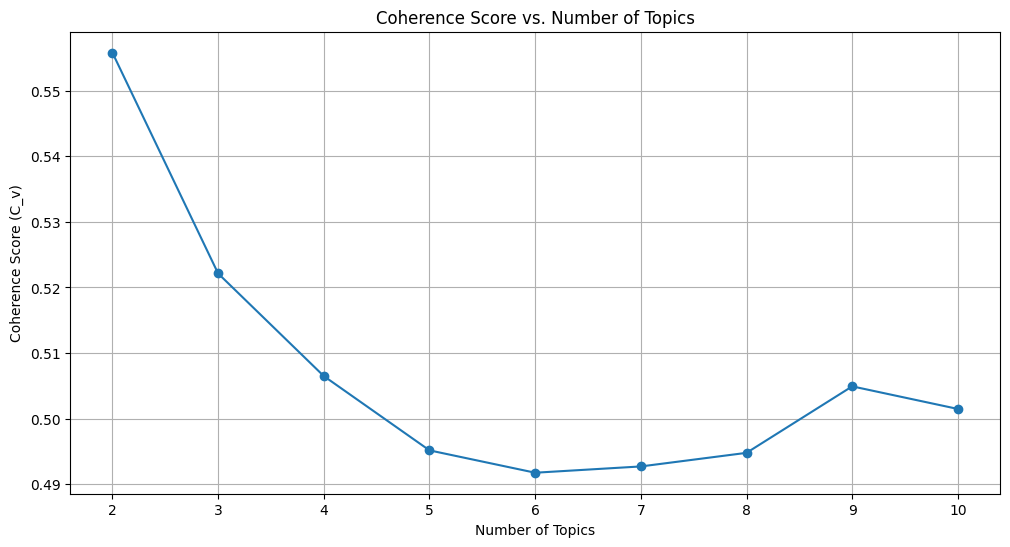

In [123]:
!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Load the model results from the CSV file
model_results_df = pd.read_csv('../Dataset/lda_tuning_results.csv')

# Filter the results for the 75% Corpus (you can change this if needed)
# filtered_results = model_results_df[model_results_df['Validation_Set'] == '20% Corpus']

# Group the results by the number of topics (Topics) and calculate the mean coherence score
coherence_by_topics = model_results_df.groupby('Topics')['Coherence'].mean()

# Plot the coherence score against the number of topics
plt.figure(figsize=(12, 6))
plt.plot(coherence_by_topics.index, coherence_by_topics.values, marker='o', linestyle='-')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (C_v)')
plt.title('Coherence Score vs. Number of Topics')
plt.grid(True)
plt.show()

In [144]:
data_topic_3 = model_results_df[model_results_df['Topics'] == 2]
max_coherence = np.array(data_topic_3['Coherence'])
print(max(model_results_df['Coherence']))
#print(max_coherence[4])
#print(np.argmax(max_coherence))

0.6752839865348129


##Visualizing the Data


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds', R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.153658  0.068794       1        1  42.406643
2      0.071214  0.150595       2        1  36.710621
0      0.093799 -0.082058       3        1  15.301080
1     -0.182409  0.035916       4        1   3.529416
4     -0.136262 -0.173246       5        1   2.052239, topic_info=        Term         Freq        Total Category  logprob  loglift
41      game  5053.000000  5053.000000  Default  30.0000  30.0000
83     money  1378.000000  1378.000000  Default  29.0000  29.0000
21      play  3763.000000  3763.000000  Default  28.0000  28.0000
9     roblox  2363.000000  2363.000000  Default  27.0000  27.0000
1    account   552.000000   552.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
223      set    18.417884   540.777873   Topic5  -5.7877   0.5066
115     scam    15.438093   250.119471   Topic5  -5.9642   1.1011
75   support    14.104059   157.953242   Topic5  -6.0546   1.4704
118     send    14.027157   193.376208   Topic5  -6.0600   1.2626
300      app    13.859482   352.398640   Topic5  -6.0721   0.6504

[381 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         1  0.391114  account
1         2  0.005432  account
1         3  0.387493  account
1         5  0.215475  account
30        1  0.493621      add
...     ...       ...      ...
234       4  0.010192     year
1130      1  0.991316  youtube
1130      2  0.002686  youtube
1130      3  0.002686  youtube
1130      5  0.002686  youtube

[1159 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2, 5])

In [145]:
lda_model_tuned = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=2,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True,
                                       alpha=0.61,
                                       eta=0.61)

In [146]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_tuned, corpus, id2word, mds='mmds', R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.039615  0.125053       1        1  65.631061
1      0.039615 -0.125053       2        1  34.368939, topic_info=         Term          Freq         Total Category  logprob  loglift
21       game  10431.000000  10431.000000  Default  30.0000  30.0000
6         kid   5776.000000   5776.000000  Default  29.0000  29.0000
40       look   2324.000000   2324.000000  Default  28.0000  28.0000
648       buy   2047.000000   2047.000000  Default  27.0000  27.0000
2780  pokemon   1290.000000   1290.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
10      great    440.751067    937.311353   Topic2  -5.7457   0.3135
104      also    519.476170   2295.605013   Topic2  -5.5814  -0.4179
8         get    510.808517   2470.101629   Topic2  -5.5982  -0.5080
83      money    479.435370   1826.653662   Topic2  -5.6616  -0.2696
77       time    518.305208   3624.759749   Topic2  -5.5836  -0.8770

[162 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
484       1  0.997661    access
484       2  0.001983    access
1245      1  0.998234   account
1245      2  0.001664   account
450       1  0.417034  actually
...     ...       ...       ...
4         2  0.267617      year
447       1  0.993322     young
447       2  0.006689     young
1877      1  0.997327   youtube
1877      2  0.002392   youtube

[224 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

: 

In [ ]:
# Get the topic distribution for each document
document_topics = lda_model.get_document_topics(corpus)
print(document_topics)


In [ ]:
# Filter reviews that have topic 1 as their main topic
reviews_in_topic_1 = [idx for idx, topics in enumerate(document_topics) if max(topics, key=lambda x: x[1])[0] == 1]

# Get the number of reviews in topic 1
num_reviews_in_topic_1 = len(reviews_in_topic_1)

print(f'There are {num_reviews_in_topic_1} reviews in topic 1.')


There are 529 reviews in topic 1.


In [ ]:
#import pandas as pd
#reviews_in_topic_1 = [idx for idx, topics in enumerate(document_topics) if max(topics, key=lambda x: x[1])[0] == 1]

#mixture = [dict(lda_model[x]) for x in corpus]
pd.DataFrame(reviews_in_topic_1).to_csv("topic_mixture.csv")

In [ ]:
print(max(document_topics))

[(4, 0.9976535)]


In [ ]:
# Filter reviews that have topic 5 as their main topic
reviews_in_topic_5 = [idx for idx, topics in enumerate(document_topics) if max(topics, key=lambda x: x[1])[0] == 5]

# Get the number of reviews in topic 5
num_reviews_in_topic_5 = len(reviews_in_topic_5)

print(f'There are {num_reviews_in_topic_5} reviews in topic 5.')

There are 0 reviews in topic 5.


In [ ]:
datax= load_data('../Dataset/finalCumulative.csv')
filtered_data = datax.drop(columns=['subreddit','date','timestamp'], axis=1)
datax= filtered_data.replace('\n', ' ', regex=True)
import re

datax= datax.loc[datax.text.str.contains('I am a bot') == False, :]

# Remove punctuation
# data['text'] = data['text'].map(lambda x: re.sub("[,\.!?/@#$^&*-_=+()%]", "", x))
datax['text'] = datax['text'].replace(r'http\S+', '', regex=True)

#data['text'] = data['text'].replace(r'a'+ u'\u0301'+ 'U+20AC'+ 'U+2122', "'" , regex=True)

datax['text'] = datax['text'].map(lambda x: re.sub('[%$:,\.!?/-]', ' ', x))
datax['text'] = datax['text'].map(lambda x: re.sub('\(', ' ', x))
datax['text'] = datax['text'].map(lambda x: re.sub('\)', ' ', x))
datax['text'] = datax['text'].replace(r'&\S+', '', regex=True)
datax['text'] = datax['text'].replace('\"', '', regex=True)

# # Convert the titles to lowercase
datax['text'] = datax['text'].map(lambda x: x.lower())

pattern = r'[0-9]'
datax['text'] = datax['text'].map(lambda x: re.sub(pattern, ' ', x))
datax['text'] = datax['text'].map(lambda x: re.sub(' +', ' ', x))

datax.shape

(12075, 1)

In [ ]:
datax.head(5)

,text
0,live chat hi does anyone know if i can access ...
1,forgot pin i created my parental pin almost ye...
2,roblox rant this game…honestly either not enou...
3,you're not alone that's all i have to say
4,i even contacted support and they were useless


In [ ]:
datax['text'][3]
type(datax['text'][3])

resultx2 = []
for d in datax['text']:
  resultx2.append(d)

#resultx2.head[5]

In [ ]:
# Get the comments without weird spaces


i = 0
# Print the reviews
#filex=[""]
id=[" "]
textx=[" "]
comment=""
for i in datax['text']:
    #i += 1
    #print(idx)
    #print(' '.join(data_words[ix]))
    id.append(i)
    textx.append(i)
    # create a dictionary with the three lists
dict = {'ID': id,'Text':textx}

# create a Pandas DataFrame from the dictionary
df = pd.DataFrame(dict)

# write the DataFrame to a CSV file
df.to_csv('Data.csv')

#pd.DataFrame(filex).to_csv("topic_mixture1.csv")
#print(i)


In [ ]:
# Get the topic distribution for each document
document_topics = lda_model.get_document_topics(corpus)

# Filter reviews that have topic 1 as their main topic
reviews_in_topic_1_tuned = [idx for idx, topics in enumerate(document_topics) if max(topics, key=lambda x: x[1])[0] == 1]

i = 0
# Print the reviews
filex=[""]
id=[" "]
textx=[" "]
comment=""
for idx in reviews_in_topic_1:
    i += 1
    #print(idx)
    #print(' '.join(data_words[idx]))
    filex.append(data_words[idx])
    id.append(idx)
    textx.append(resultx2[idx])
    # create a dictionary with the three lists
dict = {'top words': filex, 'ID': id,'Text':textx}

# create a Pandas DataFrame from the dictionary
df = pd.DataFrame(dict)

# write the DataFrame to a CSV file
df.to_csv('EmployeeData.csv')

#pd.DataFrame(filex).to_csv("topic_mixture1.csv")
#print(i)


In [ ]:
# Get the topic distribution for each document
document_topics_tuned = lda_model_tuned.get_document_topics(corpus)

# Filter reviews that have topic 1 as their main topic
reviews_in_topic_1_tuned = [idx for idx, topics in enumerate(document_topics) if max(topics, key=lambda x: x[1])[0] == 1]

i = 0
# Print the reviews
for idx in reviews_in_topic_1_tuned:
    i += 1
    print(' '.join(data_words[idx]))

print(i)

bloxburg stats
stripping
yeah snowy strange lol
worth replying take downvote buzz
jokes lolol
farted
welcome capitalism
guess stuck knee deep roblox capitalism crap
lol
lit totally relate
check black mirror arkangel episode
hated outdoors child asthmatic allergic everything constantly getting bitten bugs like getting dirty anxiety thing loved creative pretend play best playdates usually involved sort small plastic barbie bratz polly pocket hot wheels littlest pet shop dudes lego perhaps combination thereof polly spider man often dated vaguely polly sized spider man action figure mix good ol open world storytelling got older bake dates make cupcakes cookies banana bread go upstairs experiment makeup ate gossiped kind relationship trying build little niblings one based idea indoorsy synonymous screens time
lol
wow classic hardcore
love bed wars lol
remember parking runescape telling friend eating klondike bar confused half word censored lol
hell come lol
yeah business raising losers ener

In [ ]:
# Filter reviews that have topic 1 as their main topic
reviews_in_topic_2_tuned = [idx for idx, topics in enumerate(document_topics) if max(topics, key=lambda x: x[1])[0] == 2]

i = 0
# Print the reviews
filex=[""]
id=[" "]
textx=[" "]
comment=""
for idx in reviews_in_topic_2_tuned:
    i += 1
    #print(idx)
    #print(' '.join(data_words[idx]))
    filex.append(data_words[idx])
    id.append(idx)
    textx.append(resultx2[idx])
    # create a dictionary with the three lists
dict = {'top words': filex, 'ID': id,'Text':textx}

# create a Pandas DataFrame from the dictionary
df = pd.DataFrame(dict)

# write the DataFrame to a CSV file
df.to_csv('EmployeeData2.csv')

#pd.DataFrame(filex).to_csv("topic_mixture1.csv")
#print(i)
